# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t90_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,139.622192,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
0,482.0,578.0,745.0,746.0,733.0,955.0,857.0,986.0,1035.0,1099.0,...,1431.0,1431.0,1519.0,1461.0,1491.0,1538.0,1488.0,1488.0,1528.0,1393.0
1,486.0,635.0,660.0,757.0,725.0,925.0,888.0,956.0,1035.0,1047.0,...,1523.0,1513.0,1456.0,1488.0,1510.0,1468.0,1479.0,1487.0,1540.0,1411.0
2,482.0,583.0,747.0,786.0,834.0,900.0,866.0,997.0,1060.0,1023.0,...,1501.0,1450.0,1459.0,1486.0,1520.0,1448.0,1503.0,1509.0,1480.0,1463.0
3,499.0,611.0,665.0,741.0,727.0,877.0,904.0,1000.0,950.0,1138.0,...,1468.0,1524.0,1490.0,1435.0,1384.0,1483.0,1530.0,1560.0,1565.0,1515.0
4,522.0,586.0,644.0,772.0,808.0,876.0,807.0,889.0,1011.0,1085.0,...,1641.0,1380.0,1546.0,1397.0,1509.0,1443.0,1507.0,1546.0,1569.0,1487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,323.0,433.0,503.0,584.0,599.0,655.0,633.0,755.0,805.0,848.0,...,773.0,649.0,709.0,666.0,745.0,740.0,823.0,798.0,747.0,695.0
1032,415.0,474.0,559.0,586.0,604.0,679.0,626.0,769.0,777.0,776.0,...,695.0,732.0,707.0,725.0,701.0,805.0,724.0,779.0,750.0,704.0
1033,379.0,445.0,542.0,565.0,639.0,636.0,633.0,703.0,755.0,800.0,...,705.0,677.0,735.0,721.0,745.0,763.0,717.0,794.0,781.0,729.0
1034,382.0,443.0,523.0,577.0,618.0,737.0,602.0,806.0,747.0,838.0,...,716.0,764.0,764.0,772.0,744.0,761.0,753.0,791.0,686.0,790.0


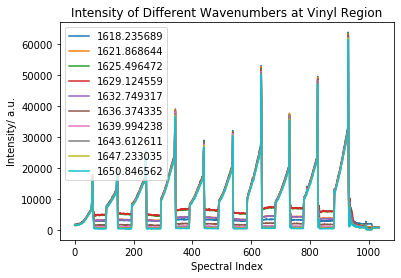

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region')
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.559307'] --> When using loc.
# df.columns.get_loc('1629.124559') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label 1629.559307. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

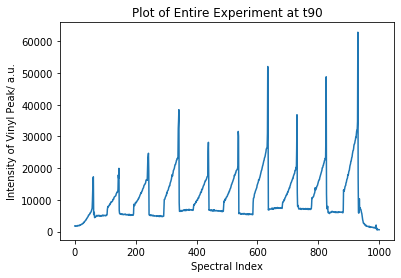

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:1000,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t90')
plt.show()

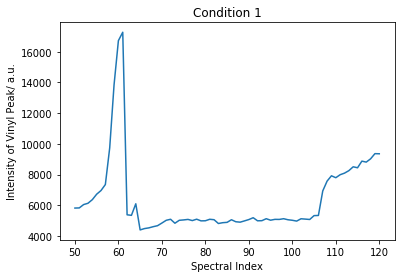

In [6]:
# Condition
df.loc[50:120,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1')
plt.show()

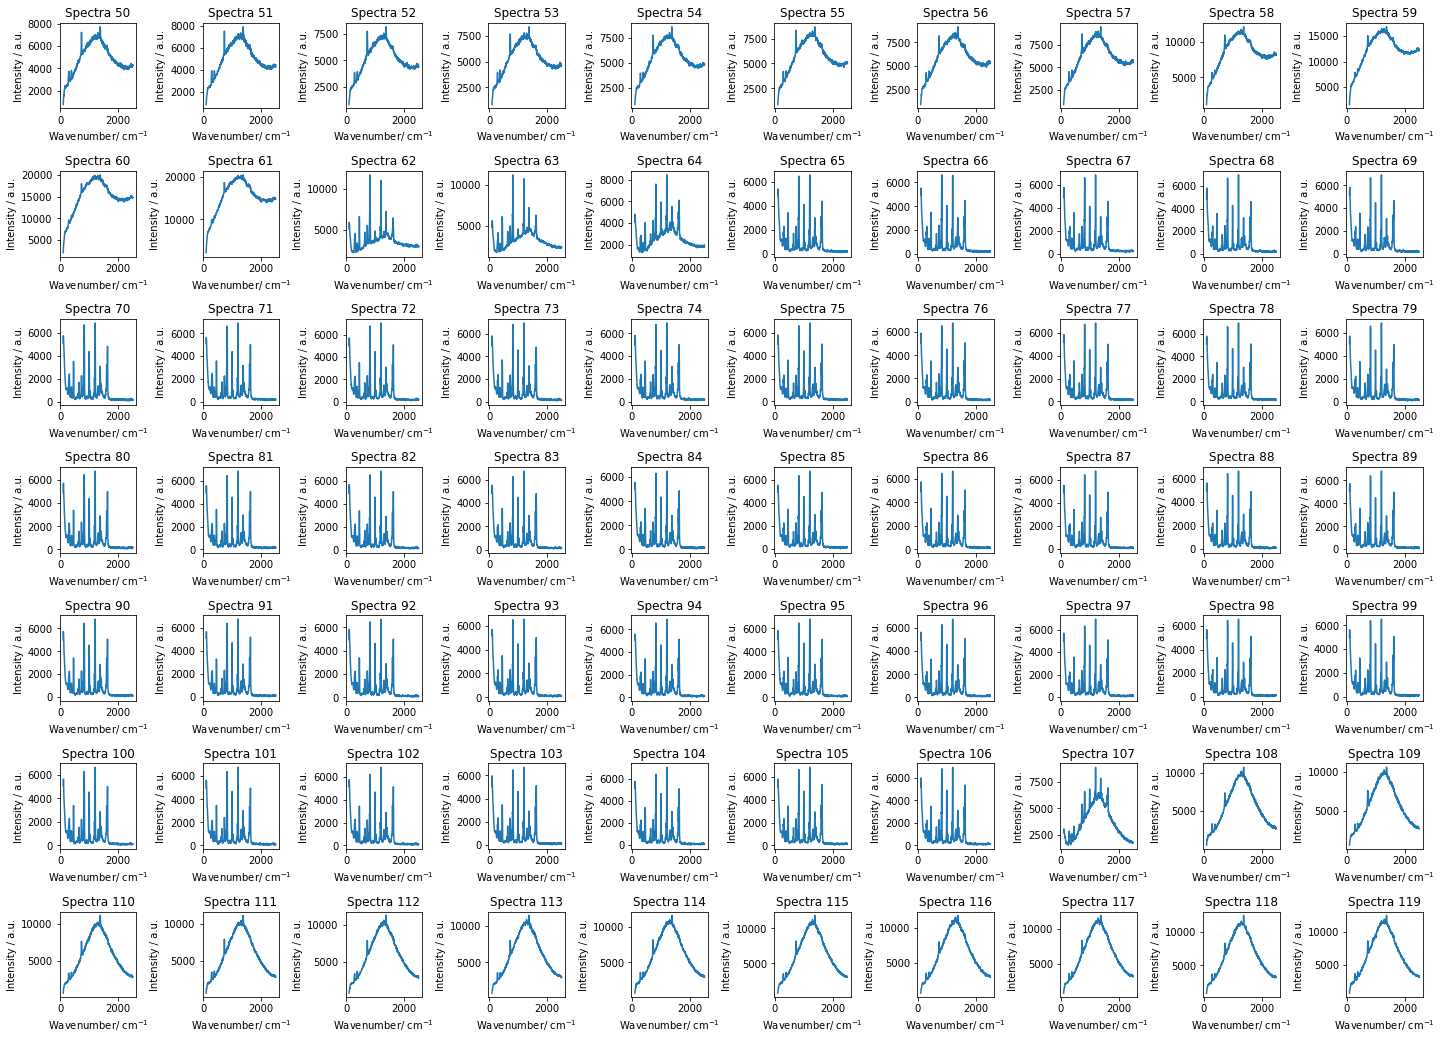

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(50, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-39))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[85:99, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =1)
condition1_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
85,1,4901.0,5468.0,5502.0,5354.0,4818.0,4473.0,3925.0,3609.0,3451.0,...,168.0,89.0,125.0,126.0,134.0,156.0,171.0,134.0,193.0,120.0
86,1,4934.0,5626.0,5744.0,5565.0,4977.0,4380.0,4007.0,3631.0,3573.0,...,172.0,107.0,106.0,155.0,78.0,130.0,167.0,119.0,169.0,73.0
87,1,4907.0,5524.0,5477.0,5476.0,4892.0,4558.0,4121.0,3689.0,3273.0,...,124.0,103.0,107.0,126.0,120.0,163.0,112.0,143.0,187.0,69.0
88,1,4986.0,5554.0,5638.0,5449.0,4896.0,4387.0,4107.0,3755.0,3489.0,...,119.0,70.0,123.0,142.0,153.0,106.0,160.0,154.0,127.0,124.0
89,1,5110.0,5599.0,5713.0,5405.0,4926.0,4722.0,3930.0,3886.0,3535.0,...,141.0,71.0,112.0,135.0,129.0,119.0,199.0,161.0,167.0,45.0
90,1,5007.0,5746.0,5601.0,5517.0,5132.0,4418.0,4078.0,3763.0,3448.0,...,169.0,89.0,121.0,164.0,143.0,176.0,160.0,192.0,89.0,64.0
91,1,5118.0,5576.0,5665.0,5652.0,4970.0,4621.0,4118.0,3700.0,3598.0,...,199.0,124.0,137.0,111.0,163.0,94.0,154.0,139.0,173.0,83.0
92,1,4939.0,5813.0,5798.0,5437.0,5007.0,4540.0,4055.0,3751.0,3408.0,...,125.0,50.0,149.0,107.0,109.0,110.0,132.0,108.0,126.0,91.0
93,1,5158.0,5677.0,5601.0,5610.0,4864.0,4597.0,4009.0,3727.0,3566.0,...,153.0,56.0,130.0,135.0,98.0,125.0,135.0,152.0,142.0,99.0
94,1,5074.0,5472.0,5575.0,5422.0,5051.0,4492.0,4168.0,3843.0,3598.0,...,63.0,37.0,109.0,122.0,130.0,130.0,106.0,139.0,158.0,89.0


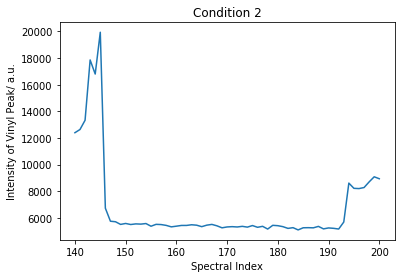

In [9]:
# Condition
df.loc[140:200,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2')
plt.show()

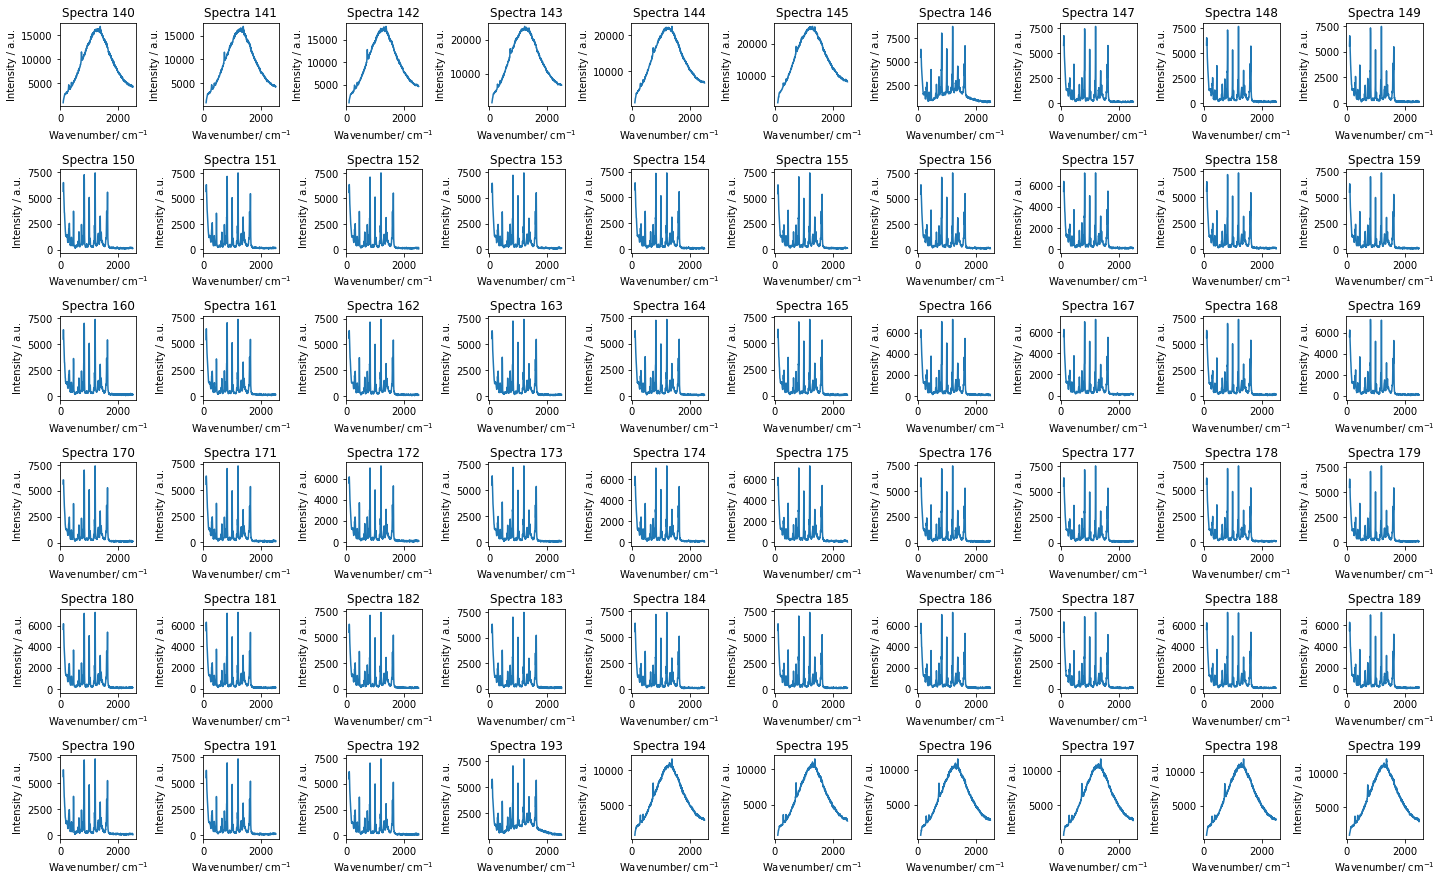

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(140, 200):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-139))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[170:184, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =2)
condition2_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
170,2,5669.0,6066.0,6069.0,6011.0,5331.0,5013.0,4586.0,3997.0,3891.0,...,121.0,99.0,167.0,98.0,155.0,96.0,146.0,171.0,87.0,123.0
171,2,5541.0,6334.0,6312.0,5897.0,5475.0,4870.0,4403.0,4107.0,3697.0,...,176.0,81.0,185.0,117.0,160.0,164.0,160.0,129.0,172.0,88.0
172,2,5578.0,6115.0,6158.0,5789.0,5311.0,4974.0,4350.0,4050.0,3826.0,...,148.0,63.0,128.0,58.0,97.0,131.0,109.0,79.0,152.0,65.0
173,2,5486.0,6101.0,6361.0,5874.0,5311.0,5129.0,4337.0,4068.0,3702.0,...,147.0,51.0,122.0,109.0,88.0,132.0,116.0,122.0,88.0,98.0
174,2,5419.0,6263.0,6143.0,5947.0,5264.0,4856.0,4457.0,4128.0,3788.0,...,119.0,63.0,169.0,108.0,104.0,162.0,151.0,117.0,147.0,46.0
175,2,5483.0,6179.0,6101.0,5973.0,5420.0,4861.0,4326.0,4086.0,3686.0,...,125.0,112.0,128.0,121.0,145.0,180.0,154.0,131.0,150.0,37.0
176,2,5457.0,6269.0,6162.0,6117.0,5360.0,4911.0,4459.0,4015.0,3769.0,...,144.0,105.0,128.0,83.0,115.0,129.0,167.0,129.0,156.0,124.0
177,2,5548.0,6282.0,6369.0,5993.0,5275.0,4952.0,4491.0,4129.0,3909.0,...,103.0,107.0,151.0,93.0,99.0,174.0,156.0,160.0,169.0,103.0
178,2,5573.0,6162.0,6150.0,6025.0,5449.0,4943.0,4386.0,3999.0,3796.0,...,125.0,72.0,128.0,141.0,132.0,152.0,143.0,93.0,129.0,73.0
179,2,5485.0,6206.0,6303.0,6032.0,5412.0,4902.0,4459.0,4115.0,3692.0,...,161.0,53.0,147.0,158.0,122.0,139.0,150.0,120.0,118.0,97.0


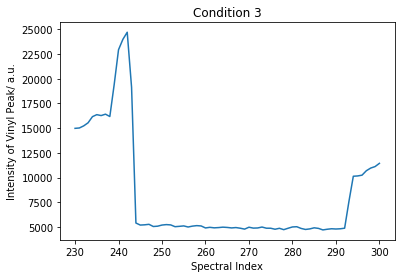

In [12]:
# Condition
df.loc[230:300,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3')
plt.show()

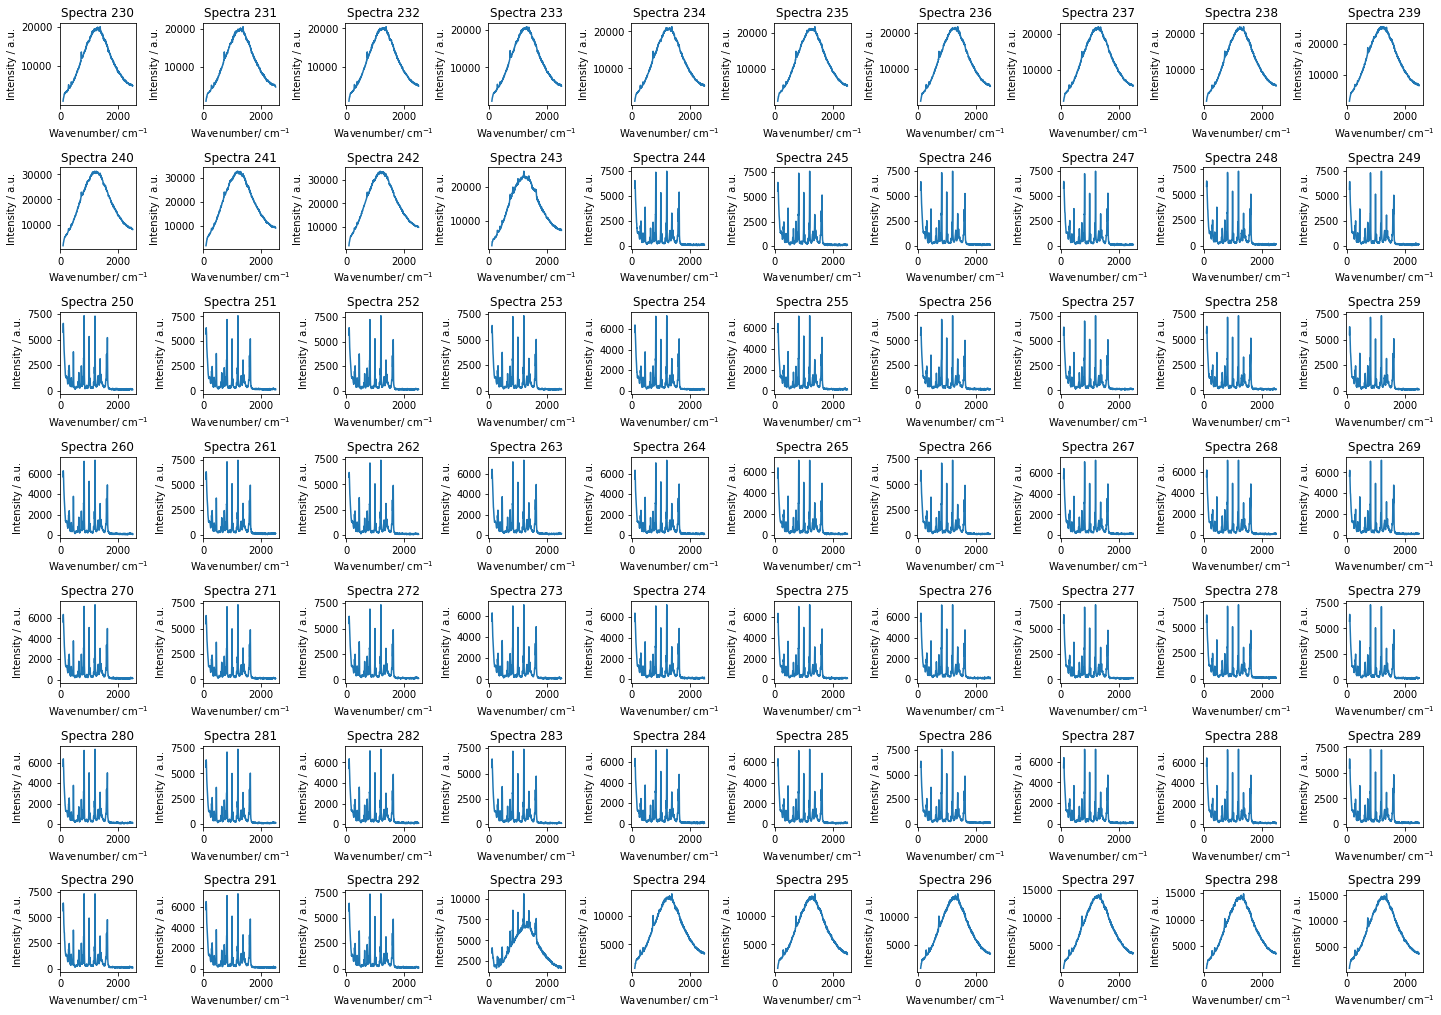

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(230, 300):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-199))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[270:284, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =3)
condition3_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
270,3,5609.0,6124.0,6336.0,5921.0,5387.0,5009.0,4440.0,3990.0,3755.0,...,206.0,108.0,154.0,148.0,147.0,155.0,175.0,115.0,152.0,121.0
271,3,5483.0,6287.0,6218.0,5768.0,5415.0,4988.0,4256.0,4122.0,3763.0,...,91.0,103.0,147.0,39.0,121.0,99.0,147.0,91.0,102.0,85.0
272,3,5518.0,6190.0,6213.0,5820.0,5389.0,5089.0,4424.0,3975.0,3756.0,...,147.0,71.0,153.0,125.0,97.0,141.0,120.0,154.0,127.0,104.0
273,3,5531.0,5926.0,6292.0,5899.0,5425.0,5000.0,4346.0,4097.0,3833.0,...,113.0,34.0,117.0,110.0,123.0,144.0,86.0,82.0,120.0,86.0
274,3,5550.0,6339.0,6309.0,5868.0,5245.0,5005.0,4338.0,4085.0,3841.0,...,115.0,71.0,141.0,104.0,148.0,115.0,154.0,106.0,182.0,43.0
275,3,5548.0,6245.0,6374.0,6052.0,5426.0,4935.0,4278.0,4184.0,3780.0,...,105.0,75.0,80.0,46.0,38.0,91.0,121.0,138.0,114.0,101.0
276,3,5596.0,6216.0,6384.0,5997.0,5437.0,5022.0,4305.0,4126.0,3794.0,...,171.0,75.0,108.0,91.0,134.0,153.0,116.0,133.0,176.0,44.0
277,3,5609.0,6232.0,6409.0,5832.0,5450.0,5046.0,4512.0,4084.0,3835.0,...,117.0,135.0,146.0,110.0,137.0,131.0,164.0,104.0,161.0,79.0
278,3,5533.0,6211.0,6251.0,6012.0,5288.0,5054.0,4391.0,4035.0,3804.0,...,122.0,32.0,141.0,82.0,129.0,161.0,170.0,119.0,115.0,52.0
279,3,5706.0,6121.0,6376.0,5929.0,5384.0,4919.0,4403.0,4154.0,4008.0,...,136.0,80.0,93.0,108.0,103.0,165.0,131.0,168.0,156.0,128.0


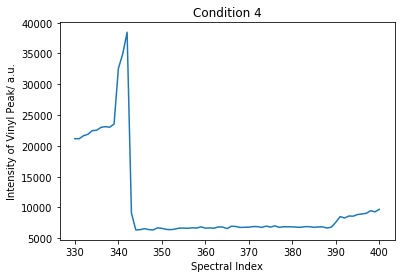

In [15]:
# Condition
df.loc[330:400,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4')
plt.show()

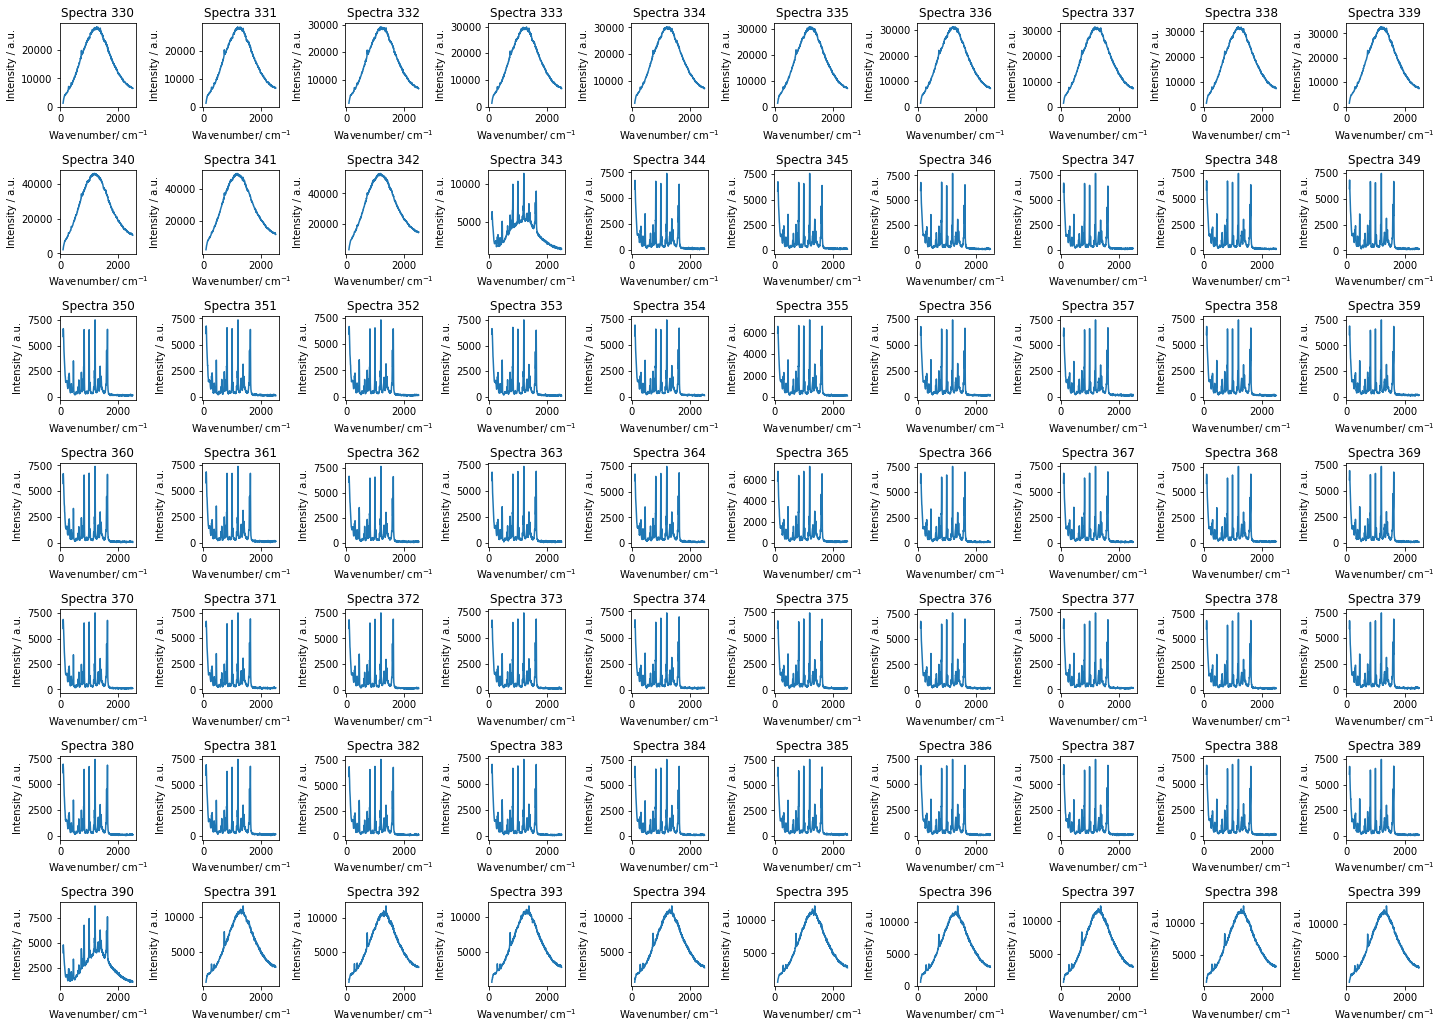

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(330, 400):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-329))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[370:384, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =4)
condition4_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
370,4,6013.0,6897.0,6764.0,6333.0,5867.0,5368.0,4813.0,4410.0,4255.0,...,127.0,108.0,128.0,136.0,160.0,126.0,110.0,123.0,134.0,112.0
371,4,6163.0,6565.0,6675.0,6393.0,5930.0,5391.0,4947.0,4555.0,4196.0,...,168.0,84.0,85.0,117.0,146.0,123.0,112.0,142.0,118.0,150.0
372,4,5989.0,6829.0,6697.0,6437.0,5890.0,5365.0,4797.0,4521.0,4147.0,...,202.0,76.0,204.0,131.0,140.0,138.0,151.0,153.0,196.0,114.0
373,4,6020.0,6643.0,6673.0,6477.0,5858.0,5607.0,4809.0,4532.0,4229.0,...,136.0,81.0,183.0,145.0,176.0,158.0,136.0,174.0,152.0,74.0
374,4,5984.0,6589.0,6705.0,6597.0,6002.0,5466.0,4884.0,4462.0,4265.0,...,189.0,110.0,161.0,136.0,176.0,165.0,231.0,205.0,146.0,134.0
375,4,5978.0,6619.0,6665.0,6409.0,5867.0,5450.0,4840.0,4420.0,4202.0,...,135.0,61.0,150.0,137.0,131.0,135.0,88.0,116.0,110.0,132.0
376,4,6156.0,6789.0,6695.0,6640.0,5906.0,5525.0,4893.0,4615.0,4225.0,...,153.0,139.0,151.0,101.0,164.0,153.0,139.0,128.0,198.0,98.0
377,4,5967.0,6701.0,6866.0,6545.0,5886.0,5394.0,4893.0,4508.0,4235.0,...,169.0,113.0,143.0,169.0,142.0,137.0,152.0,188.0,135.0,119.0
378,4,6045.0,6801.0,6864.0,6605.0,6004.0,5473.0,4933.0,4549.0,4175.0,...,145.0,131.0,168.0,179.0,198.0,147.0,163.0,179.0,184.0,135.0
379,4,5958.0,6700.0,6714.0,6505.0,5901.0,5205.0,4894.0,4439.0,4269.0,...,126.0,110.0,202.0,91.0,140.0,192.0,148.0,154.0,160.0,118.0


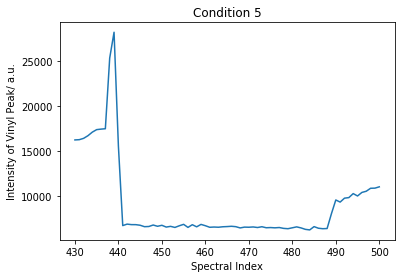

In [18]:
# Condition
df.loc[430:500,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5')
plt.show()

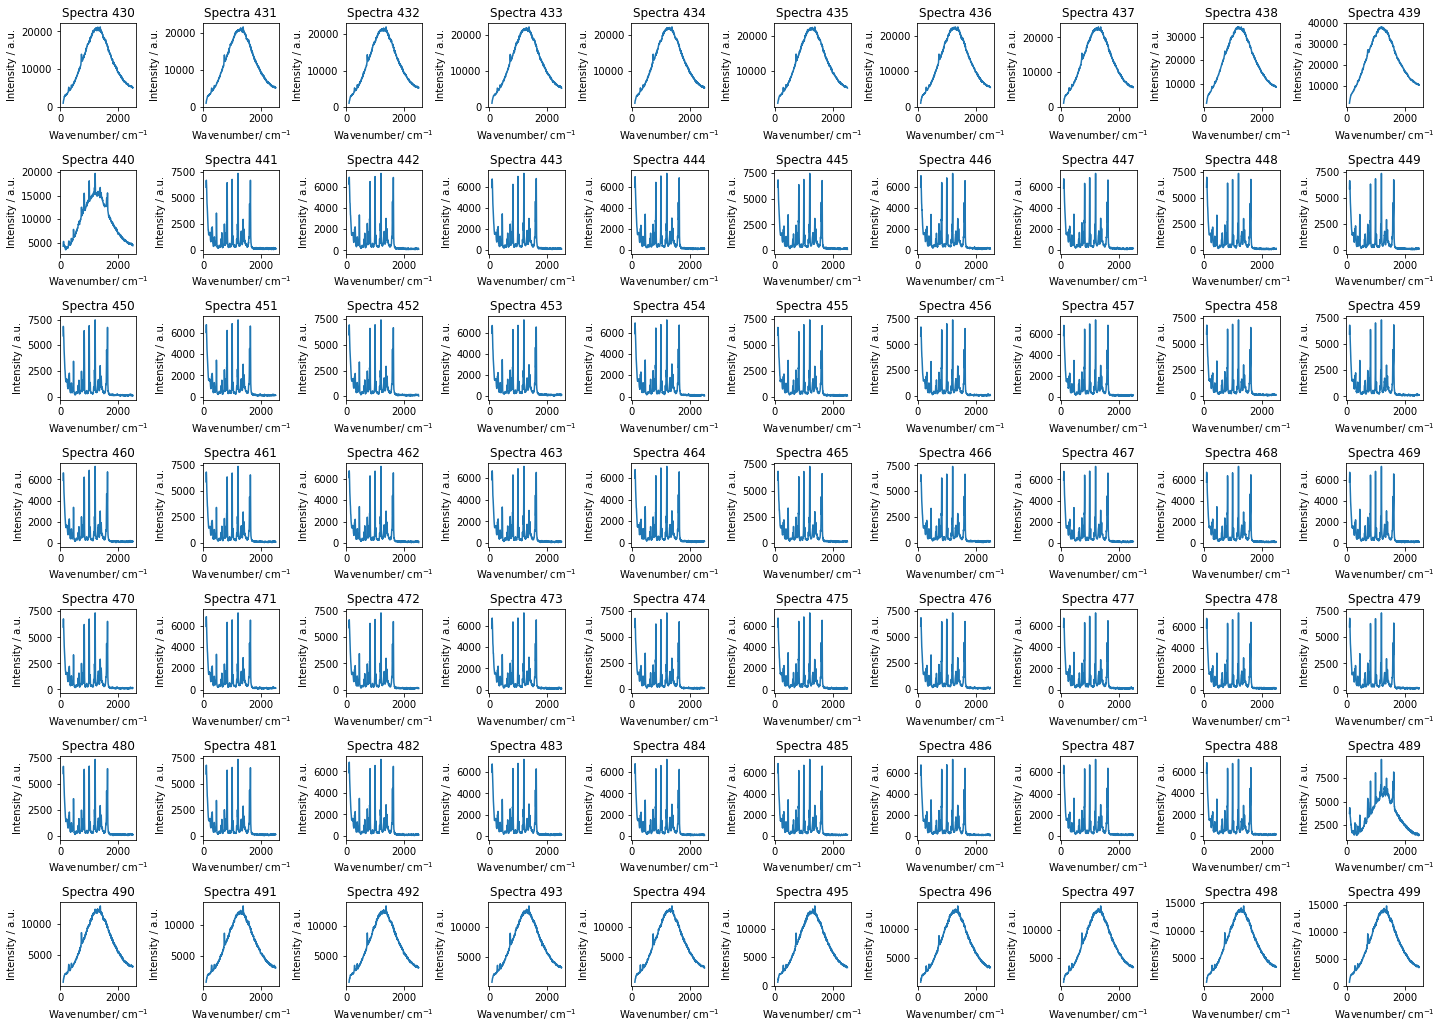

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(430, 500):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-429))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[470:484, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =5)
condition5_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
470,5,5993.0,6635.0,6780.0,6477.0,5950.0,5469.0,4861.0,4559.0,4162.0,...,119.0,75.0,176.0,97.0,103.0,153.0,197.0,132.0,137.0,131.0
471,5,5983.0,6808.0,6900.0,6484.0,5977.0,5413.0,4668.0,4541.0,4116.0,...,109.0,113.0,139.0,151.0,143.0,147.0,162.0,176.0,173.0,123.0
472,5,5931.0,6661.0,6688.0,6263.0,5765.0,5294.0,4706.0,4653.0,4177.0,...,133.0,122.0,180.0,157.0,113.0,148.0,156.0,146.0,187.0,108.0
473,5,5796.0,6679.0,6773.0,6474.0,5948.0,5354.0,4959.0,4388.0,4175.0,...,151.0,50.0,184.0,103.0,101.0,95.0,189.0,122.0,159.0,88.0
474,5,5945.0,6634.0,6803.0,6465.0,5752.0,5351.0,4716.0,4512.0,4224.0,...,110.0,107.0,138.0,125.0,124.0,146.0,119.0,128.0,107.0,101.0
475,5,5898.0,6687.0,6710.0,6649.0,5802.0,5401.0,4623.0,4447.0,4156.0,...,156.0,58.0,161.0,97.0,160.0,158.0,155.0,110.0,170.0,111.0
476,5,6025.0,6516.0,6835.0,6348.0,5862.0,5283.0,4891.0,4464.0,4107.0,...,82.0,38.0,154.0,126.0,129.0,114.0,132.0,140.0,209.0,119.0
477,5,5904.0,6749.0,6654.0,6449.0,5917.0,5422.0,4944.0,4661.0,4187.0,...,105.0,111.0,122.0,156.0,118.0,177.0,128.0,91.0,182.0,77.0
478,5,5903.0,6785.0,6700.0,6518.0,5768.0,5463.0,4755.0,4383.0,4204.0,...,140.0,57.0,146.0,114.0,125.0,171.0,126.0,120.0,152.0,91.0
479,5,6015.0,6564.0,6837.0,6491.0,5988.0,5407.0,4766.0,4444.0,4198.0,...,142.0,73.0,115.0,147.0,118.0,130.0,105.0,104.0,175.0,77.0


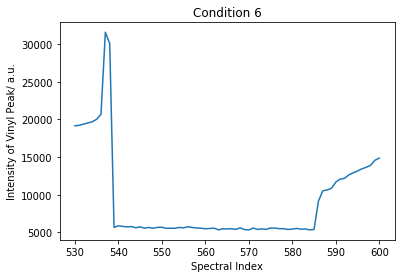

In [21]:
# Condition
df.loc[530:600,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6')
plt.show()

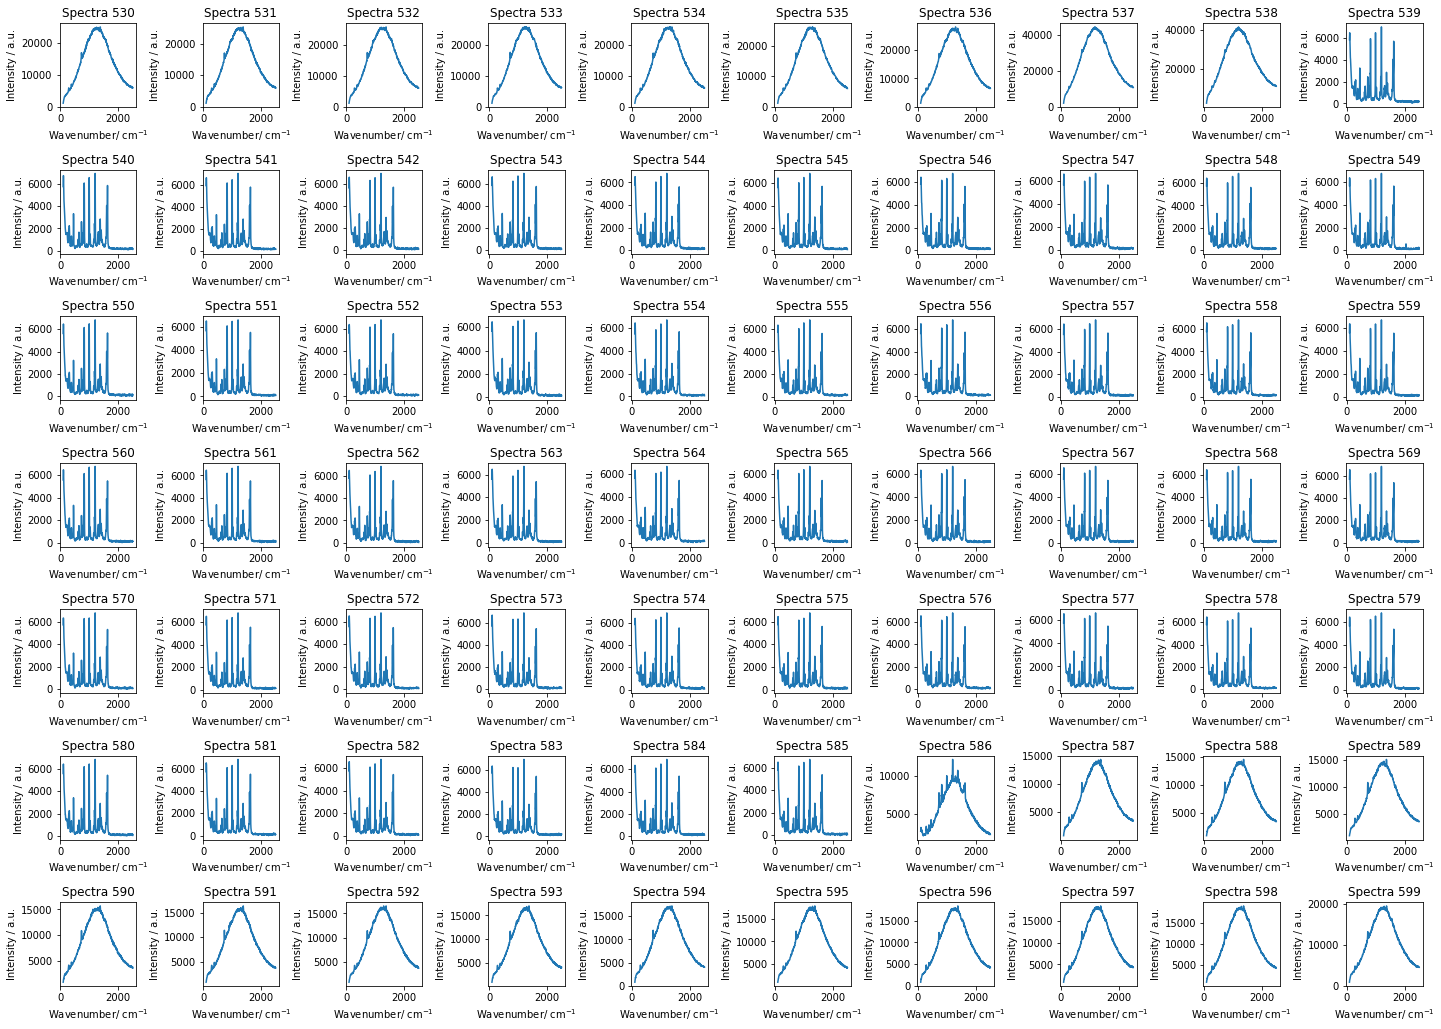

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(530, 600):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-529))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[565:579, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =6)
condition6_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
565,6,5634.0,6230.0,6361.0,5981.0,5558.0,5085.0,4516.0,4195.0,3860.0,...,147.0,-14.0,148.0,63.0,188.0,115.0,140.0,105.0,138.0,75.0
566,6,5693.0,6294.0,6281.0,5975.0,5575.0,4990.0,4493.0,4176.0,3954.0,...,161.0,89.0,139.0,93.0,160.0,133.0,156.0,106.0,176.0,74.0
567,6,5511.0,6400.0,6503.0,6205.0,5662.0,5130.0,4511.0,4138.0,3936.0,...,132.0,109.0,147.0,121.0,187.0,80.0,145.0,133.0,153.0,65.0
568,6,5585.0,6432.0,6431.0,6026.0,5585.0,5128.0,4552.0,4163.0,4026.0,...,135.0,110.0,138.0,171.0,160.0,150.0,131.0,150.0,193.0,76.0
569,6,5687.0,6406.0,6537.0,6111.0,5616.0,4984.0,4613.0,4189.0,3910.0,...,204.0,122.0,105.0,103.0,127.0,133.0,140.0,157.0,146.0,124.0
570,6,5740.0,6347.0,6344.0,6204.0,5507.0,4961.0,4549.0,4269.0,3910.0,...,123.0,63.0,108.0,89.0,147.0,115.0,61.0,82.0,98.0,55.0
571,6,5783.0,6357.0,6544.0,6309.0,5665.0,5182.0,4540.0,4328.0,4010.0,...,179.0,90.0,175.0,124.0,136.0,155.0,154.0,99.0,132.0,109.0
572,6,5562.0,6502.0,6490.0,6220.0,5763.0,5160.0,4478.0,4270.0,3896.0,...,142.0,77.0,191.0,87.0,149.0,143.0,112.0,85.0,148.0,78.0
573,6,5708.0,6451.0,6678.0,6073.0,5469.0,5218.0,4600.0,4297.0,3967.0,...,161.0,91.0,130.0,118.0,135.0,123.0,106.0,178.0,175.0,82.0
574,6,5832.0,6261.0,6374.0,6233.0,5623.0,4917.0,4674.0,4312.0,3937.0,...,164.0,75.0,162.0,102.0,139.0,178.0,177.0,147.0,154.0,71.0


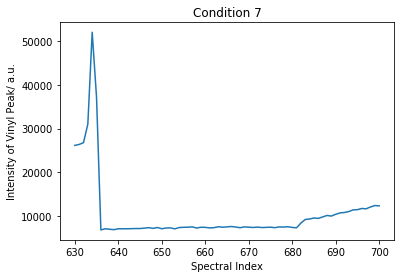

In [24]:
# Condition
df.loc[630:700,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7')
plt.show()

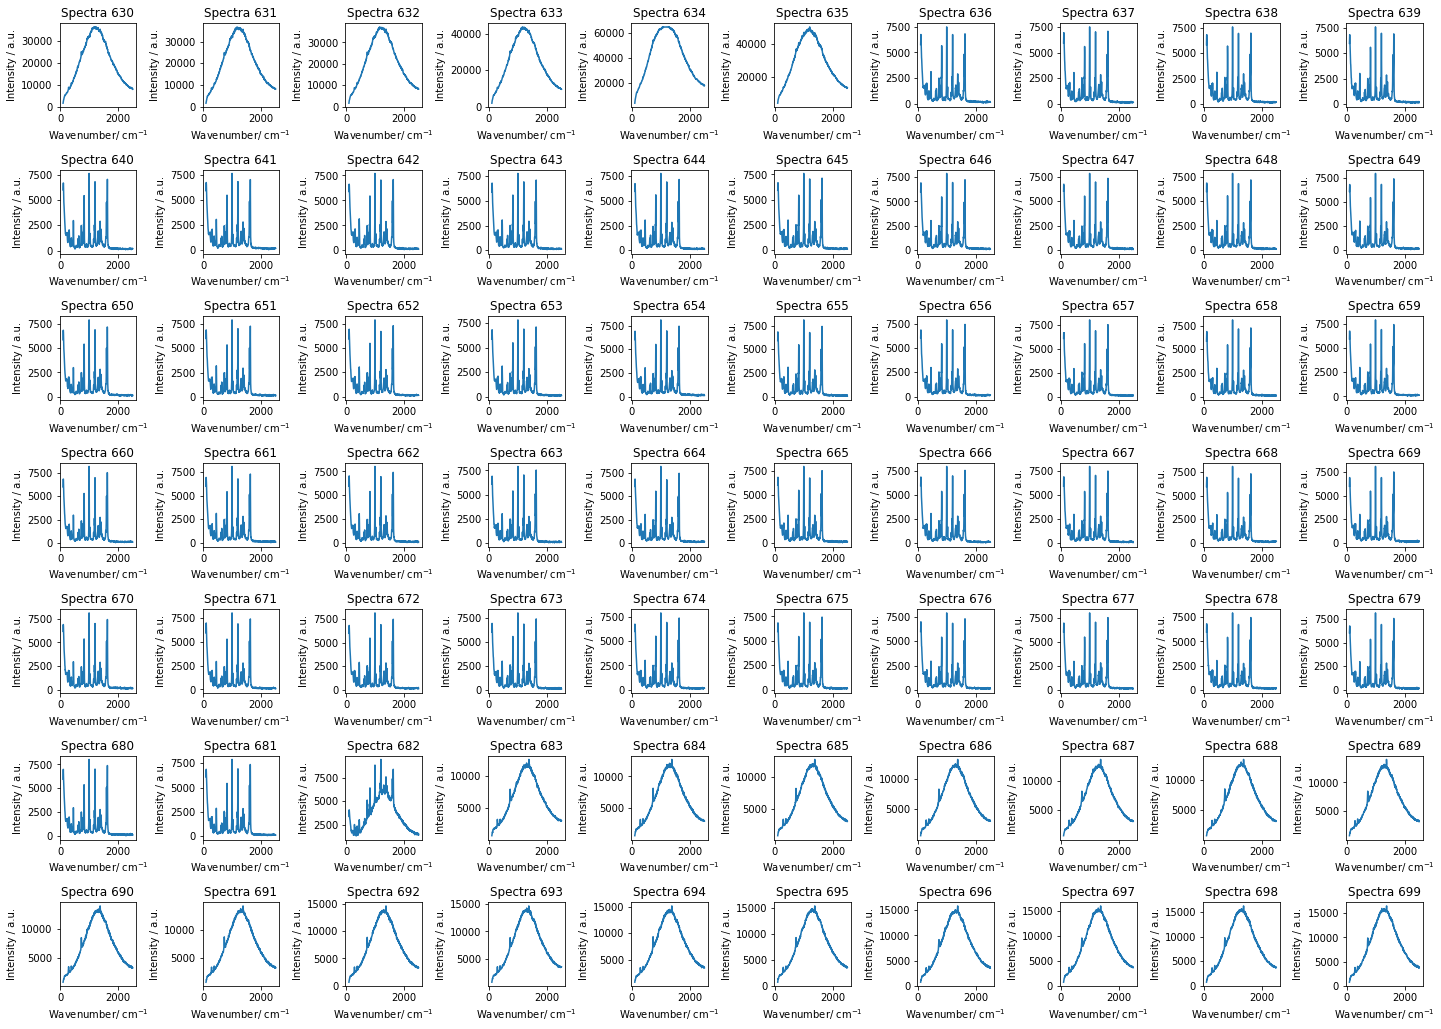

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(630, 700):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-629))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[660:674, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =7)
condition7_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
660,7,5992.0,6644.0,6831.0,6623.0,5949.0,5445.0,4991.0,4637.0,4325.0,...,149.0,102.0,168.0,195.0,125.0,148.0,151.0,155.0,165.0,117.0
661,7,5983.0,6916.0,6802.0,6518.0,6105.0,5511.0,4873.0,4577.0,4313.0,...,153.0,81.0,98.0,112.0,166.0,154.0,161.0,153.0,152.0,86.0
662,7,5945.0,6668.0,7030.0,6617.0,6045.0,5464.0,4912.0,4696.0,4331.0,...,149.0,30.0,163.0,126.0,169.0,163.0,105.0,158.0,152.0,110.0
663,7,6096.0,6753.0,6907.0,6630.0,5978.0,5452.0,4958.0,4622.0,4263.0,...,138.0,144.0,202.0,116.0,138.0,213.0,185.0,155.0,162.0,121.0
664,7,6048.0,6681.0,6829.0,6626.0,5929.0,5492.0,5160.0,4766.0,4297.0,...,144.0,83.0,133.0,154.0,137.0,192.0,154.0,147.0,181.0,154.0
665,7,6036.0,6633.0,6826.0,6692.0,6012.0,5523.0,4948.0,4672.0,4448.0,...,150.0,91.0,179.0,101.0,171.0,115.0,185.0,113.0,163.0,143.0
666,7,6016.0,6542.0,6909.0,6700.0,5938.0,5583.0,4889.0,4567.0,4302.0,...,182.0,111.0,165.0,124.0,122.0,145.0,185.0,149.0,167.0,139.0
667,7,5917.0,6777.0,6879.0,6466.0,6075.0,5544.0,5031.0,4585.0,4348.0,...,140.0,115.0,156.0,131.0,192.0,153.0,168.0,145.0,177.0,81.0
668,7,5974.0,6707.0,6951.0,6477.0,5962.0,5542.0,5000.0,4440.0,4440.0,...,151.0,106.0,191.0,195.0,157.0,193.0,148.0,215.0,198.0,195.0
669,7,5987.0,6860.0,6906.0,6520.0,6077.0,5595.0,4882.0,4725.0,4161.0,...,234.0,108.0,182.0,145.0,151.0,134.0,194.0,164.0,216.0,122.0


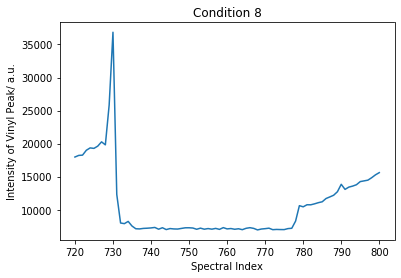

In [27]:
# Condition
df.loc[720:800,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8')
plt.show()

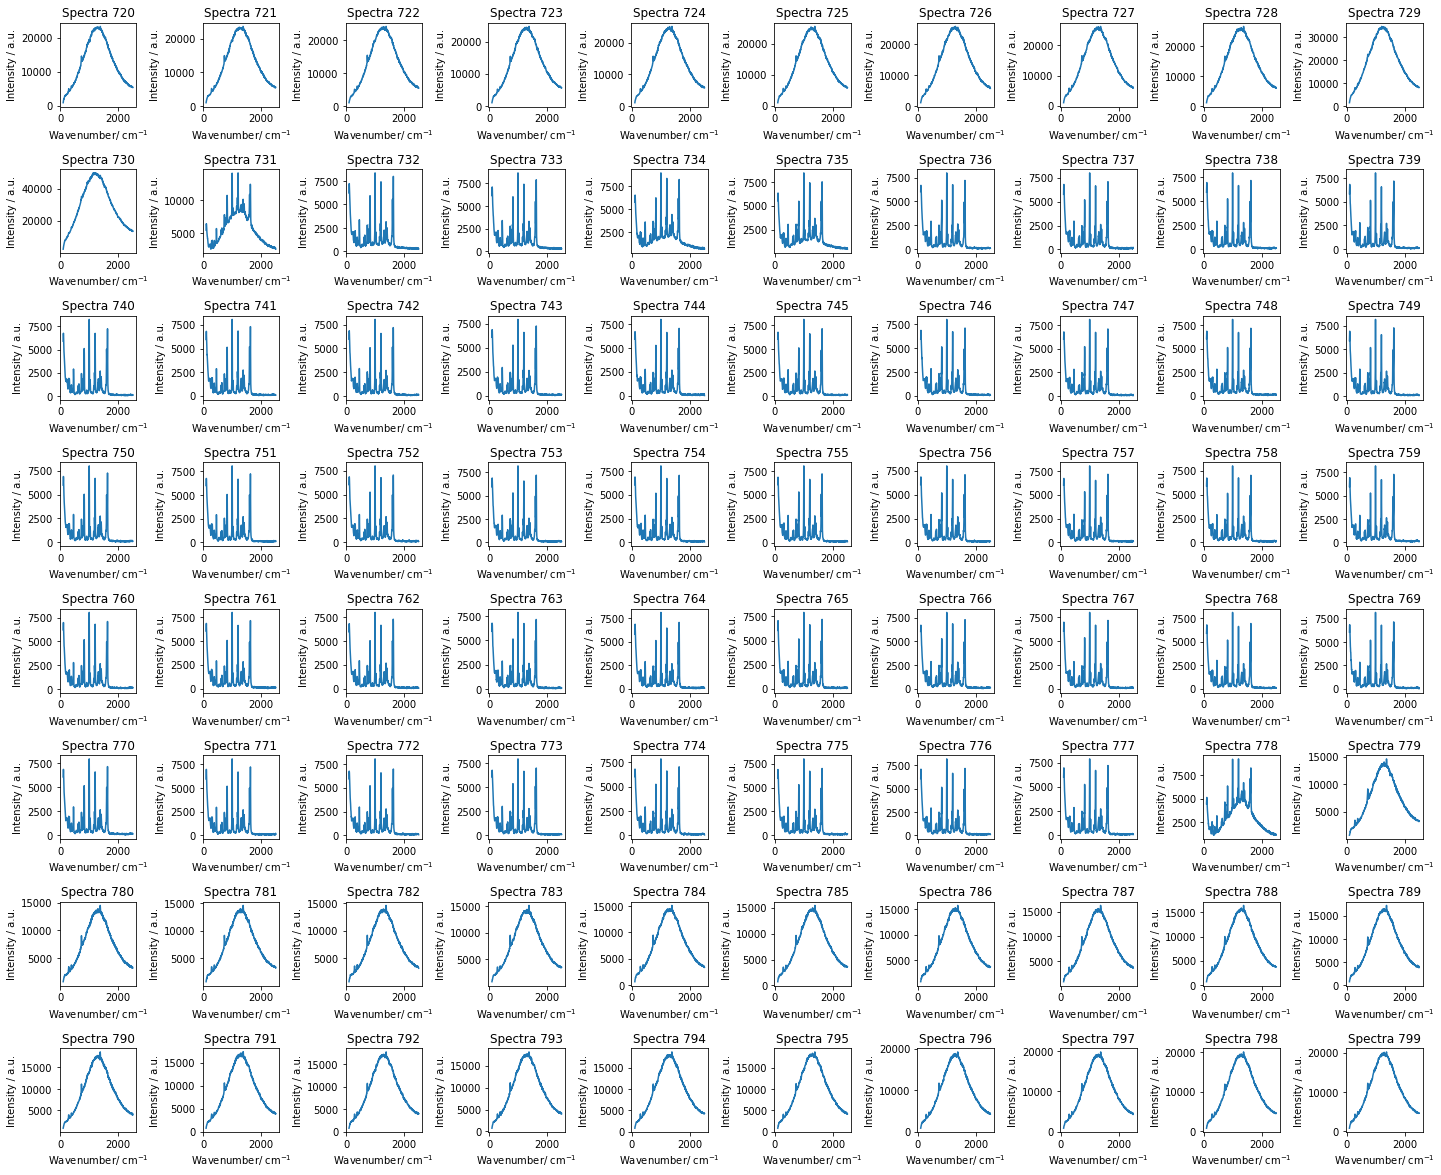

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(720, 800):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-719))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[755:769, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =8)
condition8_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
755,8,6082.0,6740.0,6848.0,6591.0,5893.0,5559.0,4870.0,4546.0,4374.0,...,147.0,115.0,142.0,173.0,109.0,136.0,150.0,115.0,140.0,96.0
756,8,6063.0,6847.0,6856.0,6586.0,5915.0,5446.0,4954.0,4586.0,4308.0,...,154.0,74.0,131.0,157.0,186.0,144.0,144.0,156.0,153.0,117.0
757,8,6029.0,6689.0,6733.0,6376.0,5825.0,5555.0,5011.0,4557.0,4243.0,...,116.0,48.0,178.0,78.0,128.0,129.0,99.0,130.0,119.0,85.0
758,8,5924.0,6602.0,6740.0,6622.0,5890.0,5595.0,4916.0,4819.0,4373.0,...,141.0,41.0,119.0,123.0,138.0,96.0,162.0,157.0,189.0,88.0
759,8,5978.0,6798.0,6935.0,6605.0,6002.0,5424.0,5003.0,4674.0,4403.0,...,165.0,93.0,128.0,115.0,116.0,159.0,122.0,120.0,156.0,70.0
760,8,6219.0,6742.0,6984.0,6398.0,5895.0,5447.0,4936.0,4488.0,4375.0,...,144.0,111.0,94.0,142.0,84.0,170.0,138.0,133.0,171.0,117.0
761,8,6055.0,6639.0,6853.0,6341.0,5808.0,5437.0,4981.0,4540.0,4239.0,...,74.0,85.0,115.0,140.0,143.0,179.0,79.0,116.0,122.0,121.0
762,8,5963.0,6691.0,6808.0,6332.0,6083.0,5591.0,4932.0,4587.0,4225.0,...,103.0,66.0,117.0,113.0,122.0,110.0,141.0,111.0,100.0,65.0
763,8,5936.0,6775.0,6681.0,6609.0,5794.0,5519.0,4880.0,4420.0,4307.0,...,142.0,36.0,136.0,87.0,122.0,112.0,134.0,87.0,131.0,105.0
764,8,5794.0,6612.0,6863.0,6517.0,5936.0,5368.0,4972.0,4511.0,4337.0,...,175.0,62.0,95.0,83.0,169.0,74.0,113.0,98.0,111.0,76.0


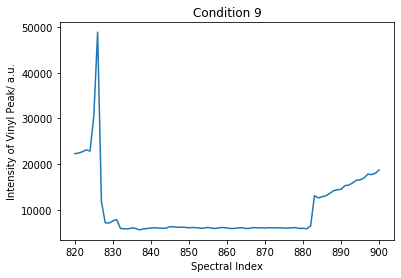

In [30]:
# Condition
df.loc[820:900,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9')
plt.show()

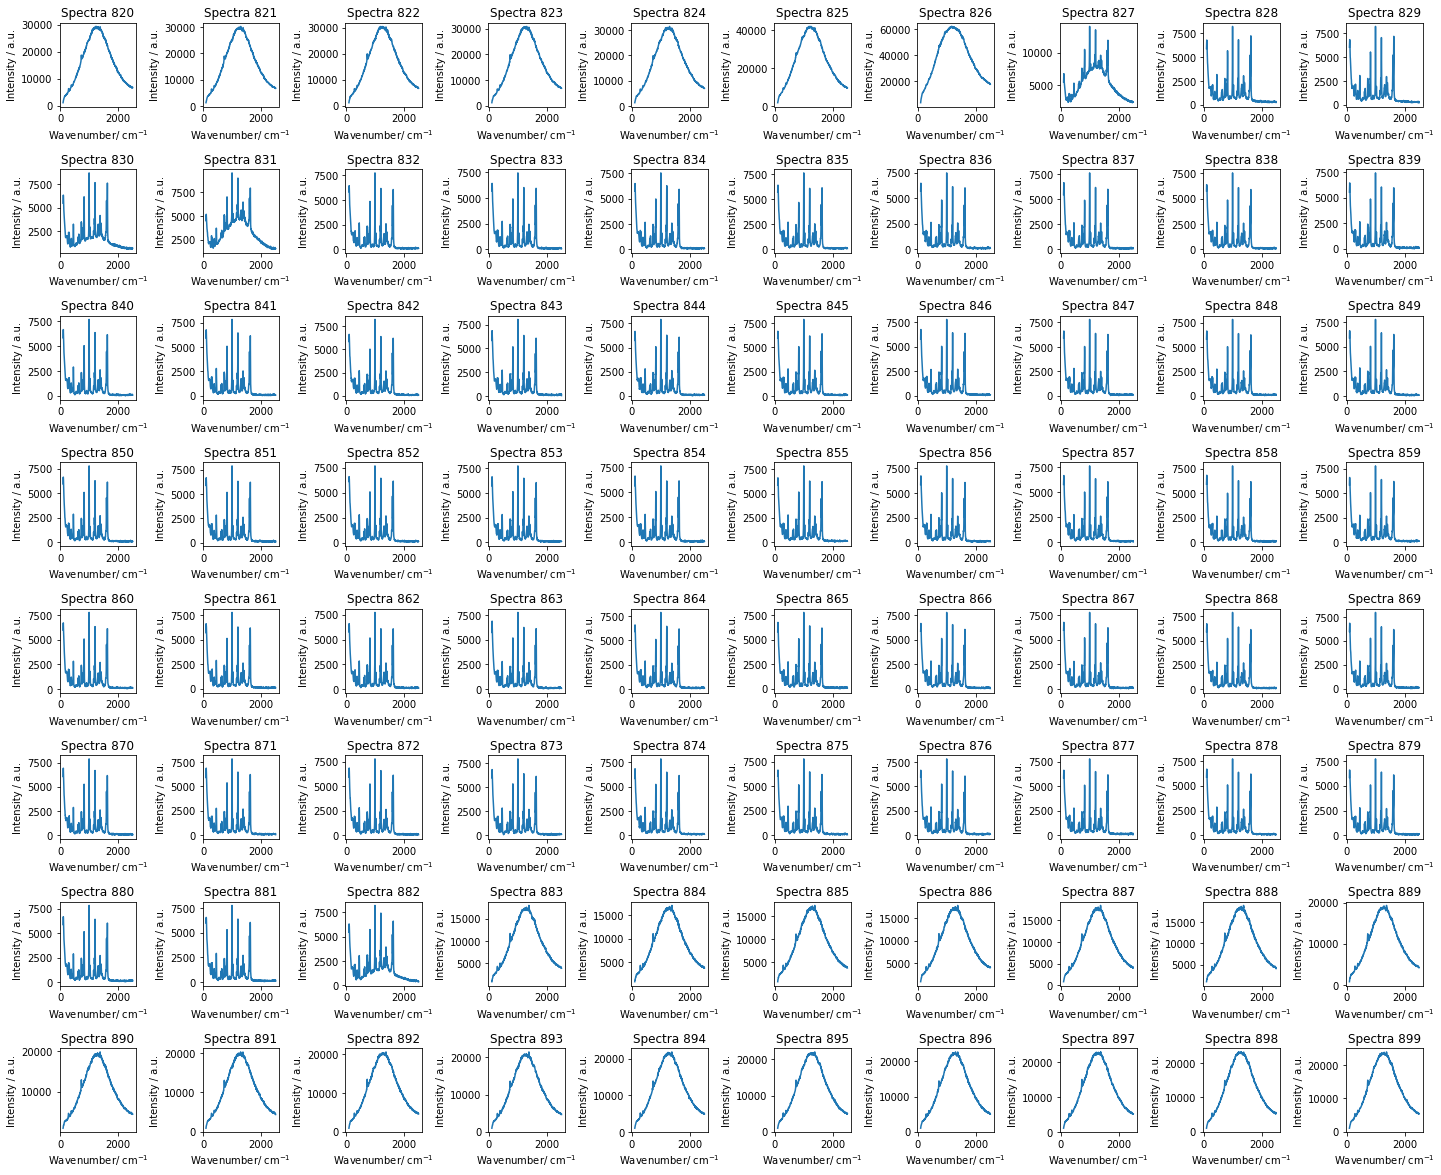

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(820, 900):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-819))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[860:874, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =9)
condition9_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
860,9,5970.0,6360.0,6697.0,6379.0,5816.0,5410.0,4745.0,4431.0,4167.0,...,149.0,96.0,117.0,100.0,133.0,142.0,97.0,166.0,125.0,104.0
861,9,5707.0,6618.0,6489.0,6339.0,5871.0,5264.0,4863.0,4383.0,4092.0,...,105.0,56.0,155.0,101.0,98.0,111.0,131.0,148.0,145.0,97.0
862,9,5780.0,6481.0,6614.0,6410.0,5791.0,5270.0,4866.0,4491.0,4049.0,...,158.0,99.0,137.0,86.0,122.0,141.0,136.0,135.0,157.0,75.0
863,9,5743.0,6519.0,6882.0,6144.0,5718.0,5262.0,4801.0,4356.0,4128.0,...,135.0,80.0,140.0,110.0,127.0,148.0,113.0,122.0,114.0,81.0
864,9,5918.0,6532.0,6594.0,6414.0,5794.0,5442.0,4813.0,4302.0,4079.0,...,103.0,51.0,160.0,120.0,154.0,163.0,153.0,116.0,149.0,92.0
865,9,5812.0,6667.0,6756.0,6212.0,5761.0,5360.0,4796.0,4368.0,4209.0,...,144.0,67.0,189.0,134.0,156.0,153.0,156.0,72.0,171.0,111.0
866,9,5866.0,6534.0,6659.0,6418.0,5718.0,5387.0,4788.0,4476.0,4209.0,...,100.0,120.0,138.0,90.0,151.0,150.0,155.0,113.0,129.0,37.0
867,9,5954.0,6600.0,6755.0,6303.0,5925.0,5451.0,4772.0,4579.0,4256.0,...,168.0,95.0,164.0,126.0,181.0,147.0,198.0,159.0,125.0,111.0
868,9,5906.0,6526.0,6726.0,6447.0,5767.0,5401.0,4899.0,4347.0,4162.0,...,76.0,52.0,152.0,84.0,160.0,109.0,137.0,113.0,174.0,78.0
869,9,5981.0,6534.0,6844.0,6323.0,5840.0,5411.0,4706.0,4622.0,4093.0,...,133.0,82.0,100.0,124.0,102.0,170.0,132.0,118.0,114.0,106.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
85,1,4901.0,5468.0,5502.0,5354.0,4818.0,4473.0,3925.0,3609.0,3451.0,...,168.0,89.0,125.0,126.0,134.0,156.0,171.0,134.0,193.0,120.0
86,1,4934.0,5626.0,5744.0,5565.0,4977.0,4380.0,4007.0,3631.0,3573.0,...,172.0,107.0,106.0,155.0,78.0,130.0,167.0,119.0,169.0,73.0
87,1,4907.0,5524.0,5477.0,5476.0,4892.0,4558.0,4121.0,3689.0,3273.0,...,124.0,103.0,107.0,126.0,120.0,163.0,112.0,143.0,187.0,69.0
88,1,4986.0,5554.0,5638.0,5449.0,4896.0,4387.0,4107.0,3755.0,3489.0,...,119.0,70.0,123.0,142.0,153.0,106.0,160.0,154.0,127.0,124.0
89,1,5110.0,5599.0,5713.0,5405.0,4926.0,4722.0,3930.0,3886.0,3535.0,...,141.0,71.0,112.0,135.0,129.0,119.0,199.0,161.0,167.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,9,6066.0,6498.0,6922.0,6394.0,5999.0,5282.0,4810.0,4378.0,4139.0,...,148.0,51.0,109.0,79.0,104.0,162.0,147.0,90.0,136.0,77.0
871,9,5916.0,6686.0,6876.0,6481.0,5956.0,5296.0,4823.0,4524.0,4151.0,...,137.0,83.0,139.0,134.0,160.0,147.0,138.0,108.0,179.0,64.0
872,9,5929.0,6652.0,6844.0,6507.0,5756.0,5454.0,4865.0,4419.0,4123.0,...,168.0,84.0,137.0,136.0,156.0,104.0,172.0,158.0,153.0,87.0
873,9,6010.0,6490.0,6864.0,6355.0,5932.0,5137.0,4820.0,4422.0,4243.0,...,129.0,108.0,160.0,156.0,141.0,136.0,127.0,174.0,130.0,112.0


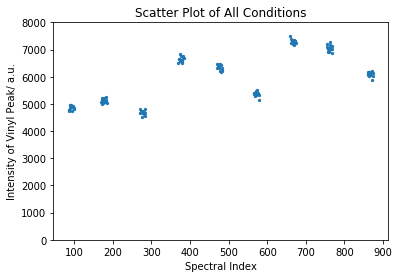

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions')
plt.ylim(0, 8000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
85,1,4901.0,5468.0,5502.0,5354.0,4818.0,4473.0,3925.0,3609.0,3451.0,...,168.0,89.0,125.0,126.0,134.0,156.0,171.0,134.0,193.0,120.0
86,1,4934.0,5626.0,5744.0,5565.0,4977.0,4380.0,4007.0,3631.0,3573.0,...,172.0,107.0,106.0,155.0,78.0,130.0,167.0,119.0,169.0,73.0
87,1,4907.0,5524.0,5477.0,5476.0,4892.0,4558.0,4121.0,3689.0,3273.0,...,124.0,103.0,107.0,126.0,120.0,163.0,112.0,143.0,187.0,69.0
88,1,4986.0,5554.0,5638.0,5449.0,4896.0,4387.0,4107.0,3755.0,3489.0,...,119.0,70.0,123.0,142.0,153.0,106.0,160.0,154.0,127.0,124.0
89,1,5110.0,5599.0,5713.0,5405.0,4926.0,4722.0,3930.0,3886.0,3535.0,...,141.0,71.0,112.0,135.0,129.0,119.0,199.0,161.0,167.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,9,6066.0,6498.0,6922.0,6394.0,5999.0,5282.0,4810.0,4378.0,4139.0,...,148.0,51.0,109.0,79.0,104.0,162.0,147.0,90.0,136.0,77.0
871,9,5916.0,6686.0,6876.0,6481.0,5956.0,5296.0,4823.0,4524.0,4151.0,...,137.0,83.0,139.0,134.0,160.0,147.0,138.0,108.0,179.0,64.0
872,9,5929.0,6652.0,6844.0,6507.0,5756.0,5454.0,4865.0,4419.0,4123.0,...,168.0,84.0,137.0,136.0,156.0,104.0,172.0,158.0,153.0,87.0
873,9,6010.0,6490.0,6864.0,6355.0,5932.0,5137.0,4820.0,4422.0,4243.0,...,129.0,108.0,160.0,156.0,141.0,136.0,127.0,174.0,130.0,112.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.124559']].groupby('Condition').describe()

1629.124559                                                          \
                count         mean        std     min     25%     50%     75%   
Condition                                                                       
1                15.0  5033.266667  86.383255  4888.0  4986.0  5057.0  5081.0   
2                15.0  5298.600000  96.065305  5084.0  5267.0  5307.0  5353.0   
3                15.0  4871.000000  91.522050  4721.0  4821.5  4865.0  4930.0   
4                15.0  6862.133333  71.024007  6771.0  6807.5  6869.0  6895.5   
5                15.0  6471.933333  99.209351  6245.0  6441.5  6485.0  6526.5   
6                15.0  5458.266667  84.619710  5325.0  5386.5  5457.0  5523.5   
7                15.0  7430.200000  88.660025  7277.0  7368.0  7441.0  7491.5   
8                15.0  7114.066667  99.750021  6941.0  7046.5  7116.0  7171.5   
9                15.0  6105.133333  70.400758  5979.0  6055.0  6123.0  6156.5   

                   
              max  
Condition          
1          5190.0  
2          5429.0  
3          5018.0  
4          7014.0  
5          6598.0  
6          5588.0  
7          7600.0  
8          7288.0  
9          6205.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_t90.csv')